#### Finance Complaint EDA

* Missing values
* Preprocessing
* Visualization
* Feature Engineering

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and removing rows which doesnt have data for `Consumer disputed?`

In [23]:
df = pd.read_csv('D:\Python\Complaints_Prediction_NLP\dataset\complaints.csv')

In [24]:
df.head(112)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,OH,44130,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008174
1,2023-05-21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,"I.C. System, Inc.",FL,33176,NaN,Consent not provided,Web,2023-05-21,Closed with explanation,Yes,NaN,7003000
2,2023-05-19,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,"HUNTINGTON NATIONAL BANK, THE",TX,77014,NaN,NaN,Web,2023-05-19,Closed with monetary relief,Yes,NaN,6999514
3,2023-05-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,CA,90015,NaN,NaN,Web,2023-05-19,Closed with explanation,Yes,NaN,7000276
4,2023-05-19,Credit card or prepaid card,Store credit card,Fees or interest,Unexpected increase in interest rate,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,OK,74112,NaN,NaN,Web,2023-05-19,Closed with explanation,Yes,NaN,7000340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2023-05-21,Checking or savings account,Checking account,Managing an account,Fee problem,NaN,NaN,WELLS FARGO & COMPANY,NV,89101,Servicemember,NaN,Web,2023-05-21,In progress,Yes,NaN,7007529
108,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,44130,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008130
109,2023-05-21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,Experian Information Solutions Inc.,MO,65646,NaN,NaN,Web,2023-05-21,In progress,Yes,NaN,7007684
110,2023-05-21,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Card opened as result of identity theft or fraud,NaN,NaN,SYNCHRONY FINANCIAL,FL,33065,NaN,NaN,Web,2023-05-21,In progress,Yes,NaN,7007686


In [25]:
df.shape

(3698786, 18)

In [26]:
df = df[df['Consumer disputed?'].isin(['Yes', 'No'])]

### Saving the dataframe

In [27]:
df.to_csv('Complaints.csv')

### Using the new Dataframe

In [2]:
df = pd.read_csv('D:\Python\Complaints_Prediction_NLP\Research\Complaints.csv', )

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(768358, 18)

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-01-04,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Experian Information Solutions Inc.,TX,77083,NaN,NaN,Web,2015-01-04,Closed with explanation,Yes,No,1179812
1,2013-09-04,Credit card,NaN,Credit determination,NaN,NaN,NaN,"CITIBANK, N.A.",AZ,85140,NaN,NaN,Web,2013-09-03,Closed with explanation,Yes,No,511971
2,2014-06-10,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Right to dispute notice not received,NaN,NaN,SYNCHRONY FINANCIAL,CO,80229,NaN,NaN,Web,2014-06-10,Closed with explanation,Yes,No,887712
3,2014-01-08,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,"CITIBANK, N.A.",MN,55443,NaN,NaN,Web,2014-01-08,Closed with explanation,Yes,No,659653
4,2014-09-11,Credit card,NaN,Other fee,NaN,NaN,NaN,"CITIBANK, N.A.",OH,43227,NaN,NaN,Referral,2014-09-18,Closed with explanation,Yes,No,1024933


In [5]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
def describe(df):

  """
  This function returns a table describing the statistics of a DataFrame.

  Args:
    df: A Pandas DataFrame.

  Returns:
    A Pandas DataFrame containing the following columns:
      * Number of unique elements
      * Count
      * Missing
  """

  unique_elements = df.nunique()
  count = df.count()
  missing = df.isnull().sum()

  # Create a table
  table = pd.DataFrame({
    "Number of unique elements": unique_elements,
    "Count": count,
    "Missing": missing
  })

  # Print the table
  return table

describe(df)


,Number of unique elements,Count,Missing
Date received,1970,768358,0
Product,13,768358,0
Sub-product,50,533198,235160
Issue,99,768358,0
Sub-issue,61,312988,455370
Consumer complaint narrative,160940,164034,604324
Company public response,10,195709,572649
Company,4281,768358,0
State,62,762708,5650
ZIP code,28262,764501,3857


In [7]:
# Checking the percent of 'Yes' AND 'No'
df['Consumer disputed?'].value_counts(normalize=True)*100

No     80.68895
Yes    19.31105
Name: Consumer disputed?, dtype: float64

In [8]:
# Filter the dataset to only include rows where the dispute value is "Yes"
yes_dispute_df = df[df['Consumer disputed?'] == 'Yes']

# Group the filtered dataset by company
grouped_df = yes_dispute_df.groupby('Company')

# Count the number of disputes for each company
dispute_count = grouped_df['Consumer disputed?'].value_counts().sort_values(ascending=False)

# Print the dispute count
dispute_count.to_frame()

,,Consumer disputed?
Company,Consumer disputed?,
"BANK OF AMERICA, NATIONAL ASSOCIATION",Yes,14387
WELLS FARGO & COMPANY,Yes,11717
"EQUIFAX, INC.",Yes,10079
JPMORGAN CHASE & CO.,Yes,9523
"CITIBANK, N.A.",Yes,6697
...,...,...
"Dynamic Strategies, Inc",Yes,1
"Dwight Financial, Inc.",Yes,1
"Duke Capital, LLC",Yes,1


In [9]:
dispute_count.count()

2475

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768358 entries, 0 to 768357
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 768358 non-null  object
 1   Product                       768358 non-null  object
 2   Sub-product                   533198 non-null  object
 3   Issue                         768358 non-null  object
 4   Sub-issue                     312988 non-null  object
 5   Consumer complaint narrative  164034 non-null  object
 6   Company public response       195709 non-null  object
 7   Company                       768358 non-null  object
 8   State                         762708 non-null  object
 9   ZIP code                      764501 non-null  object
 10  Tags                          108483 non-null  object
 11  Consumer consent provided?    297837 non-null  object
 12  Submitted via                 768358 non-null  object
 13 

In [11]:
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
missing

,0
Tags,85.881191
Consumer complaint narrative,78.651358
Company public response,74.528931
Consumer consent provided?,61.237210
Sub-issue,59.265342
Sub-product,30.605525
State,0.735334
ZIP code,0.501980
Date sent to company,0.000000
Consumer disputed?,0.000000


#### Deleting the columns which has a lot of missin values

In [12]:
df.columns
drop_columns = ['Tags','Consumer complaint narrative','Company public response',
                'Consumer consent provided?','Sub-issue','Sub-product','Complaint ID','ZIP code']
df.drop(drop_columns, axis=1,inplace=True)

## Number of unique values in each columns

In [13]:
for col in df.columns:
    print(col,df[col].nunique())

Date received 1970
Product 13
Issue 99
Company 4281
State 62
Submitted via 6
Date sent to company 2049
Company response to consumer 7
Timely response? 2
Consumer disputed? 2


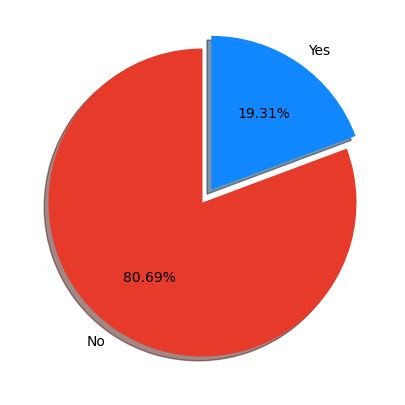

In [14]:
percentage = df['Consumer disputed?'].value_counts(normalize=True)*100
label = ['No', 'Yes']

fig,ax = plt.subplots(figsize=(10,5))
explode = (0,0.1)
colors = ['#e63a2a', '#1188ff']
ax.pie(percentage, labels = label, startangle = 90, 
       autopct = '%1.2f%%', explode=explode,
       shadow=True, colors = colors)
plt.show()

#### Produt on which the complaints were made

In [15]:
product_percentage = df['Product'].value_counts(normalize=True)*100
product_percentage.to_frame()[0:10]

,Product
Mortgage,29.528944
Debt collection,18.969022
Credit reporting,18.276507
Credit card,11.607870
Bank account or service,11.219380
Student loan,4.233443
Consumer Loan,4.109413
Payday loan,0.721148
Money transfers,0.696811
Prepaid card,0.497034


In [16]:
df['Product'].value_counts()

Mortgage                       226888
Debt collection                145750
Credit reporting               140429
Credit card                     89190
Bank account or service         86205
Student loan                    32528
Consumer Loan                   31575
Payday loan                      5541
Money transfers                  5354
Prepaid card                     3819
Other financial service          1058
Virtual currency                   18
Checking or savings account         3
Name: Product, dtype: int64

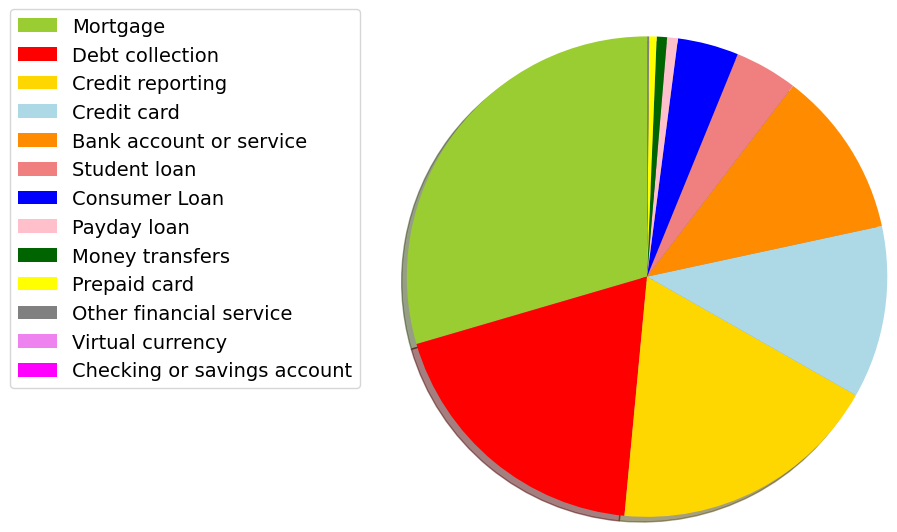

In [17]:
product_label = product_percentage.index
colors = ['yellowgreen', 'red', 'gold','lightblue', 'darkorange', 'lightcoral',
          'blue', 'pink', 'darkgreen','yellow','grey','violet', 'magenta', 'cyan']

fig, ax = plt.subplots(figsize=(10,6))
patches, texts = ax.pie(product_percentage, startangle=90, shadow=True
                        ,colors=colors, radius=1.3)

plt.legend(patches, product_label, loc='best', bbox_to_anchor=(-0.1,1.1), fontsize=14)

plt.show()

#### States in US and their impact on target features

In [18]:
top_states = df['State'].value_counts(normalize=True)*100
top_states.to_frame()

,State
CA,14.503191
FL,9.648516
TX,7.788433
NY,6.887695
GA,4.751491
...,...
MP,0.004064
MH,0.003933
AS,0.003278
AA,0.001704


<Axes: >

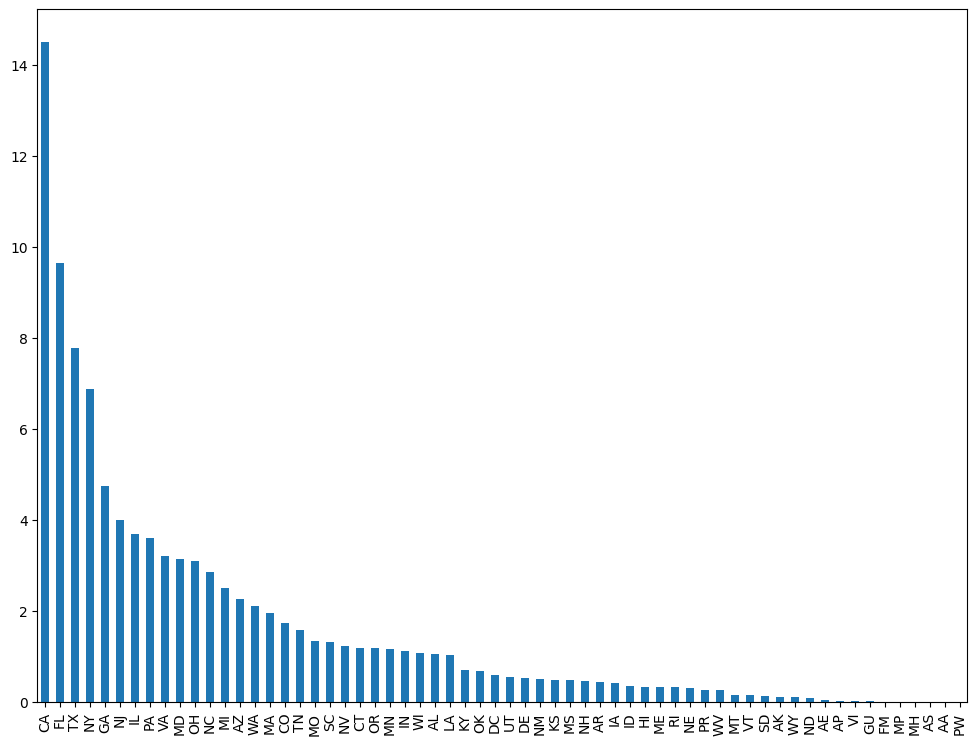

In [19]:
plt.subplots(figsize=(12,9))
top_states.plot(kind='bar')

#### Company Response
* Trying to understand the Company Response by showing the percentage of how many cunsumer disputed or not.

In [21]:
df.groupby('Company response to consumer')['Consumer disputed?'].value_counts(normalize=True).to_frame()*100

Consumer disputed?
Company response to consumer    Consumer disputed?                    
Closed                          No                           79.416274
                                Yes                          20.583726
Closed with explanation         No                           78.771316
                                Yes                          21.228684
Closed with monetary relief     No                           89.415405
                                Yes                          10.584595
Closed with non-monetary relief No                           88.370777
                                Yes                          11.629223
Closed with relief              No                           86.651584
                                Yes                          13.348416
Closed without relief           No                           73.074771
                                Yes                          26.925229
Untimely response               No                           99.928290
                                Yes                           0.071710

In [22]:
dispute_df = df.loc[df['Consumer disputed?']=='Yes']
dispute_df['Company response to consumer'].value_counts(normalize=True).to_frame()*100

,Company response to consumer
Closed with explanation,82.690830
Closed with non-monetary relief,7.479545
Closed with monetary relief,3.665638
Closed without relief,3.242394
Closed,2.443085
Closed with relief,0.477160
Untimely response,0.001348


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Closed with explanation'),
  Text(1, 0, 'Closed with non-monetary relief'),
  Text(2, 0, 'Closed with monetary relief'),
  Text(3, 0, 'Closed'),
  Text(4, 0, 'Closed without relief'),
  Text(5, 0, 'Closed with relief'),
  Text(6, 0, 'Untimely response')])

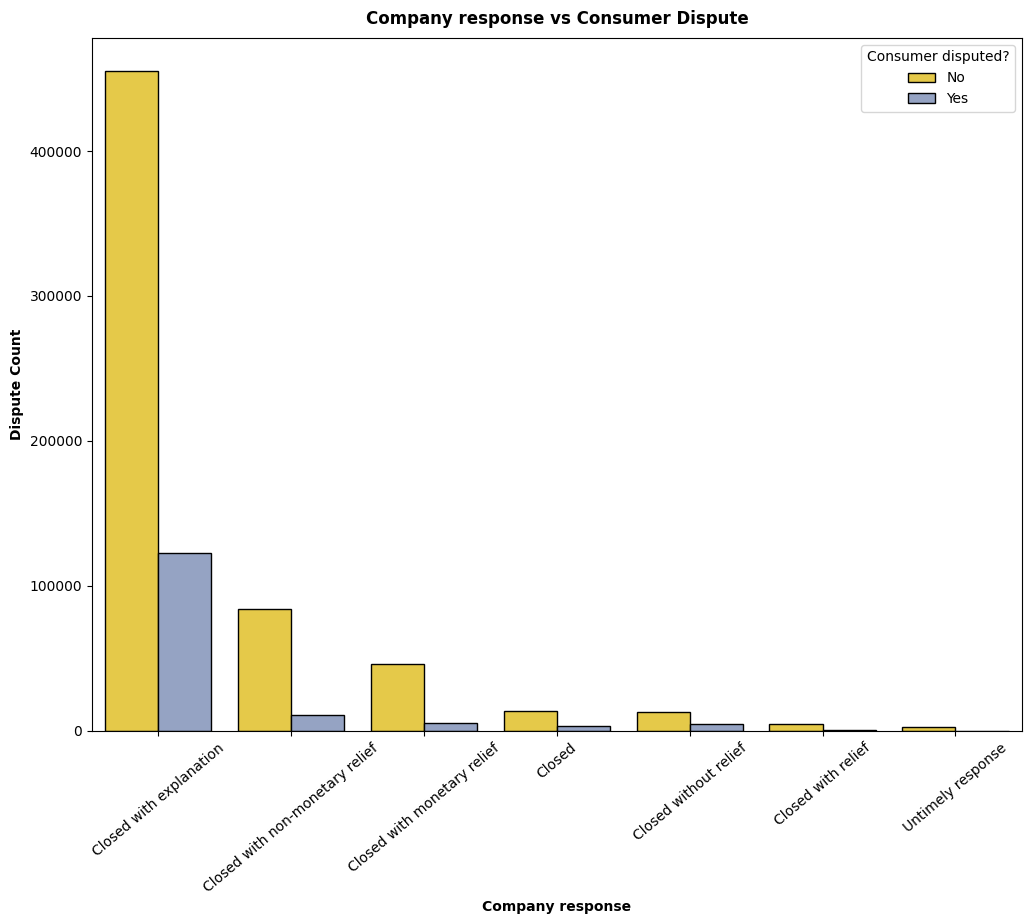

In [23]:
plt.subplots(figsize=(12,9))
sns.countplot(x='Company response to consumer', hue='Consumer disputed?',
              data=df, ec='black', palette='Set2_r')
plt.title("Company response vs Consumer Dispute", weight='bold', pad = 10)
plt.ylabel('Dispute Count', weight='bold')
plt.xlabel('Company response', weight='bold')
plt.xticks(rotation=40)

#### Finance Complaint Year and Disputed Consumer's Count

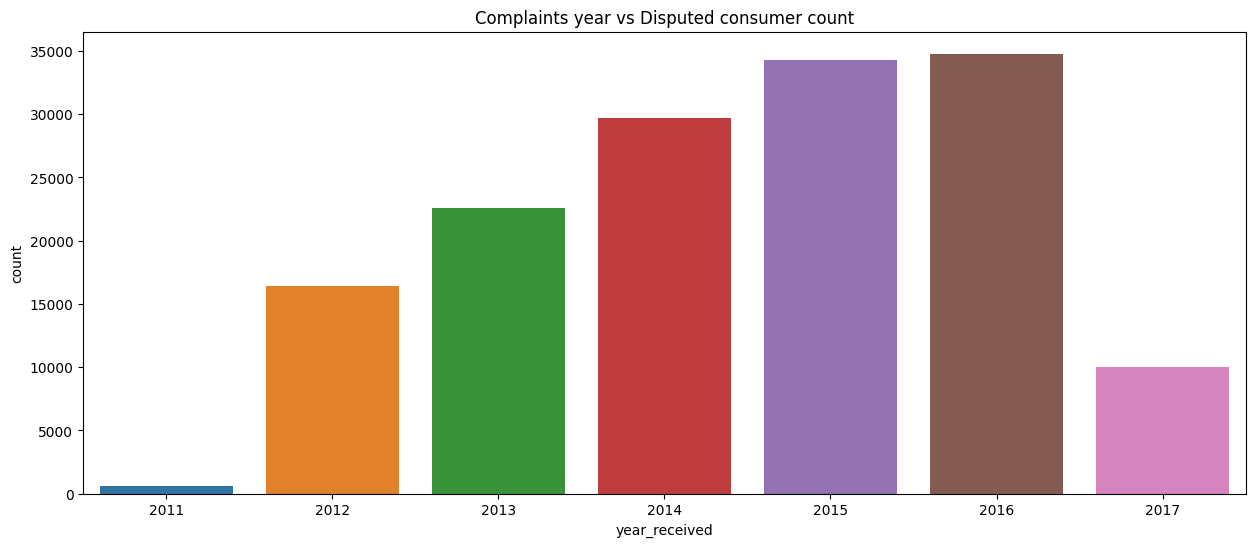

In [30]:
viz_df = dispute_df.copy()
viz_df['Date_received'] = pd.to_datetime(viz_df['Date received']).dt.date
viz_df['month_received'] = pd.to_datetime(viz_df['Date_received']).dt.month
viz_df['year_received'] = pd.to_datetime(viz_df['Date_received']).dt.year

plt.subplots(figsize =(15,6))
sns.countplot(x='year_received', data=viz_df)
plt.title('Complaints year vs Disputed consumer count')
plt.show()

#### Complaints submission

In [31]:
df['Submitted via'].value_counts(normalize=True).to_frame()*100

,Submitted via
Web,68.065277
Referral,17.341005
Phone,6.792277
Postal mail,6.334547
Fax,1.421603
Email,0.045291


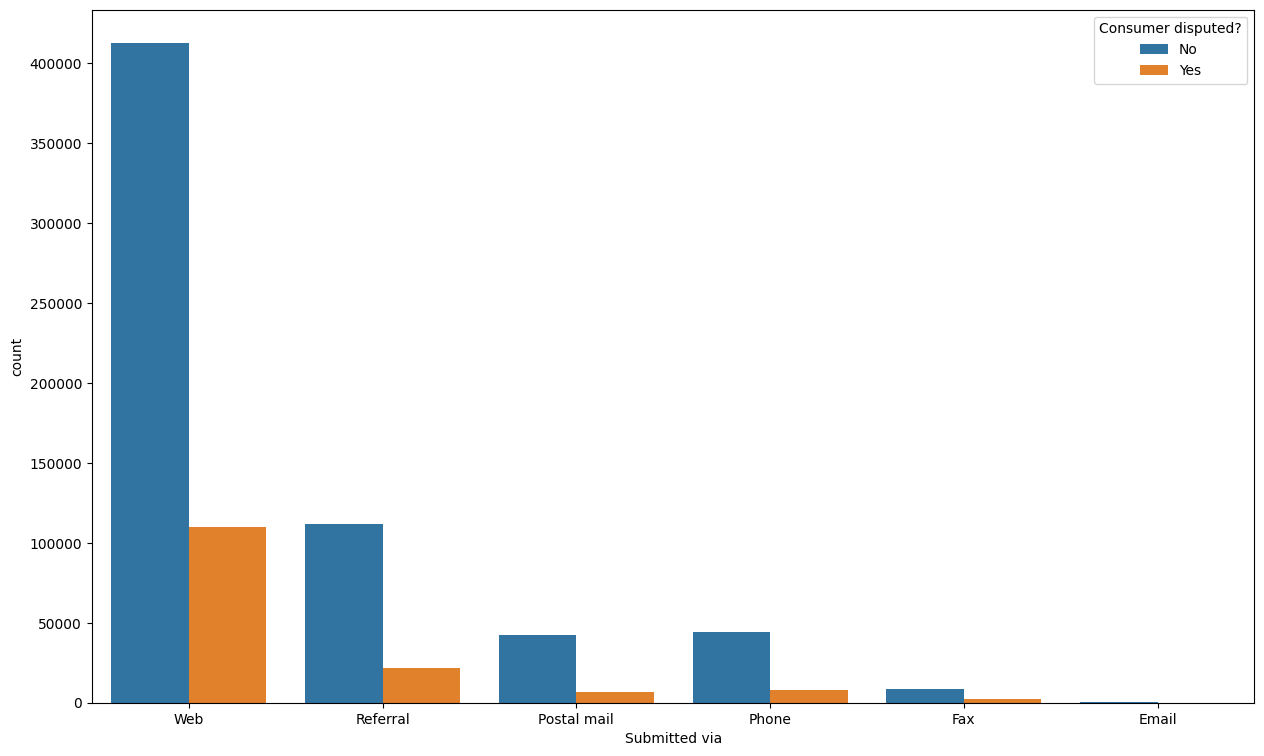

In [39]:
plt.subplots(figsize =(15,9))
sns.countplot(x='Submitted via',hue='Consumer disputed?',data=df)
plt.show()